# Greenland contribution to sea level

Use IMBIE 2012, Box et al. 2018, Mouginot et al. 2019...


In [5]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.append('../code')
import SeaLevelContrib as slc

In [ ]:
importlib.reload(slc)

### IMBIE 2012 data

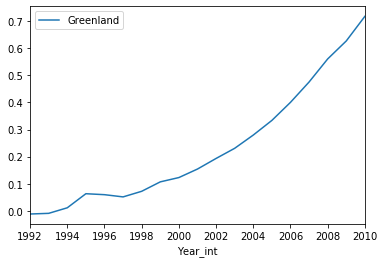

In [19]:
green_dir = '/Users/dewilebars/Projects/SLBudget/data/Greenland/'
im_df = pd.read_excel(green_dir  + 'imbie_dataset-2012_11_29.xlsx', 
                      sheet_name='Greenland')
im_df = im_df.set_index('Year')
im_df = pd.DataFrame(data=dict( Greenland=im_df[im_df.columns[2]]))

im_df['Year_int'] = im_df.index.astype(int)
grouped = im_df.groupby('Year_int', axis=0)
im_full_years = grouped.size() == 12
im_df = grouped.mean()
im_df = im_df[im_full_years]
im_df = im_df / 10 # Convert from mm to cm
im_df.plot()

### Mouginot et al. 2019 data

In [12]:
# Data copied from the "MB cumul" table, line "GIS" from the sheet "(2) MB_GIS"
# and exported to a csv file as:
#A = pd.read_clipboard(header=None)
#A.to_csv(path_or_buf= green_dir + 'Mouginot2019_MB.txt') #index=False


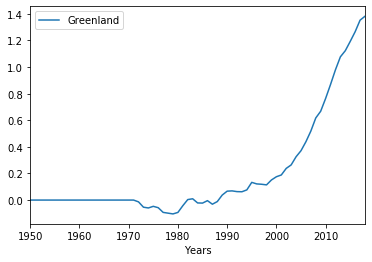

In [7]:
mo_df = slc.green_mouginot19_glo()
mo_df.plot()

### IMBIE Greenland 2019

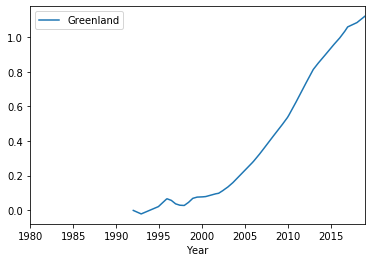

In [22]:
im19_df = pd.read_excel(green_dir
                        +'imbie_dataset_greenland_dynamics-2020_02_28.xlsx', 
                      sheet_name='Greenland Equivalent Sea Level')
im19_df = im19_df.set_index('Year')
im19_df = pd.DataFrame(data=dict( Greenland=im19_df[im19_df.columns[2]]))
im19_df = im19_df/10 # Convert from mm to cm

# im_df['Year_int'] = im_df.index.astype(int)
# grouped = im_df.groupby('Year_int', axis=0)
# im_full_years = grouped.size() == 12
# im_df = grouped.mean()
# im_df = im_df[im_full_years]
# im_df = im_df / 10 # Convert from mm to cm
# im_df.plot()
im19_df.plot()

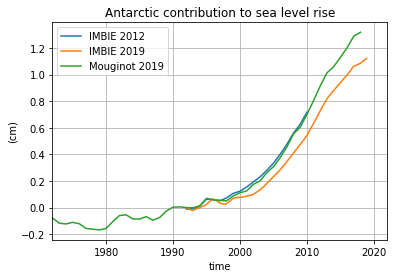

In [26]:
#Plot time series of sea level rise
fig, ax = plt.subplots() #figsize=(12,12)
ax.plot(im_df, '-', label='IMBIE 2012')
ax.plot(im19_df, '-', label='IMBIE 2019')
ax.plot(mo_df - mo_df.loc[1992], '-', label='Mouginot 2019')
#ax.set_aspect(1)
plt.xlabel('time')
plt.ylabel('(cm)')
plt.title('Antarctic contribution to sea level rise')
ax.grid(True)
ax.set_xlim([1972,2022])
plt.legend(loc='upper left')

#plt.savefig('../Figures/CompareGeenlandSLR.pdf')